# Análisis de datos - Trabajo final integrador

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQATNC-EBwF-LIbDVv_L0gkP2V6oKQzah5GRg&usqp=CAU"/>

Se propone realizar el ciclo completo del desarrollo de un modelo de aprendizaje automático supervisado.

Trabajaremos con un [dataset de Kaggle con datos de por distintas estaciones metereológicas de Australia](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv).

El objetivo es predecir si lloverá o no al día siguiente (variable *RainTomorrow*), en función datos metereológicos del día actual.


## Enunciado

- Descargar el [dataset de kaggle](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv)

### 1. Análisis exploratorio inicial

- Visualizar las primeras filas.
- Realizar un resumen de 5 números.
- Identificar los tipos de datos: categórico, ordinal, etc. Responder para cada variable su tipo y si es informativa para un problema de clasificación (por ejemplo si se trata de un código, como una matrícula, o un nombre propio).
- Identificar las variables de entrada y de salida del problema.
- Variables de entrada:
  - Realizar los siguientes análisis por tipo de variable.
    - Numéricas: 
      - Obtener conclusiones acerca de la distribución de los datos.
    - Categóricas
        - Obtener conclusiones acerca de cardinalidad, representación de cada categoría, etc.
    - Compuestas/otros. ¿Cómo pueden tratarse para utilizarlas en el problema elegido?
- Variables de salida:
  - ¿Están balanceadas las clases?
  - ¿Qué técnicas consideraría para codificar la variable de salida? Justificar.

### 2. Esquema de validación de resultados

- Los pasos siguientes comprenden las etapas de preparación de datos y evaluación de resultados. 
- Para ello, se debe particionar el dataset en entrenamiento y validación.

### 3. Limpieza y preparación de datos / ingeniería de features

- Datos faltantes. Indicar cantidad de observaciones y valores faltantes para cada variable.
- ¿Qué supuestos puede realizar acerca de los datos faltantes? ¿Qué técnicas de imputación recomendaría?. Ensayar distintas técnicas y analizar los resultados. 
- En función del estudio inicial de las variables que se hizo en la sección anterior, elegir una técnica de codificación para cada variable. Cuando lo considere apropiado, ensayar distintas técnicas y comparar los resultados, teniendo en cuenta el tipo de clasificador a utilizar. Nota: para tipos de datos compuestos o estructurados, considerar la obtención de variables de tipo númerico/categórico.
- ¿Qué puede decir acerca de las relaciones entre las variables de entrada?

- Antes de entrenar un modelo de aprendizaje automático, ¿Podría identificar las variables de entrada de mayor importancia?. Considerar por lo menos dos técnicas para cada variable. Explique brevemente los métodos utilizados.

### 4. Entrenamiento de modelos

- Recurriendo a los modelos que conozca, defina una lista de modelos candidatos a entrenar (puede ser el mismo tipo de clasificador con distintos hiperparámetros). Nota: no se contemplará el desempeño del modelo elegido, sino las conclusiones que puedan establecerse a partir de la preparación previa de los datos.

- Ensaye distintas cadenas de procesamiento con las técnicas consideradas en la sección 3 (por ejemplo, distintas técnicas de imputación, selección de variables de entrada, codificación de variables categóricas, transformación, etc.).

### 5. Evaluación de resultados y conclusiones

- ¿Qué puede concluir acerca de los modelos y preparaciones de datos ensayadas? Tener en cuenta como cada preparación afecta a los distintos modelos.

### 6. Presentación de resultados

- Elabore un informe de dos o tres páginas describiendo el procedimiento realizado y las conclusiones importantes indicando la ruta del código fuente en git.


___
## 0. Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from math import radians
from geopy.geocoders import Nominatim
from sklearn.model_selection import train_test_split

pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
from utils import plot_utils, dataset_handler, transform_data, imputer

transformer = transform_data.Transformer('nb')
imputer = imputer.Imputer('nb')

___
## 1. Análisis exploratorio inicial

In [4]:
# Read dataset
df = pd.read_csv('./data/weatherAUS.csv')

In [5]:
# Show dataset head
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
# Show main statistics
print("Cantidad de registros originales:", df.shape[0])
print("Cantidad de campos originales:", df.shape[1])
print("Principales estadísicas del dataset:")
df.describe()

Cantidad de registros originales: 145460
Cantidad de campos originales: 23
Principales estadísicas del dataset:


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [7]:
# dataset bigpicture
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

### Separación de features y labels

In [8]:
# Separación en features y labels
label = 'RainTomorrow'
Y = df[label].copy()
X = df.drop(label, axis=1).copy()
print("df shape:", df.shape)
print("X shape:", X.shape)
print("Y shape:", Y.shape)

df shape: (145460, 23)
X shape: (145460, 22)
Y shape: (145460,)


### Análisis de tipo de datos

In [9]:
X_numerical = X.select_dtypes(include='float64')
X_numerical.shape

(145460, 16)

In [10]:
X_categorical = X.select_dtypes(include='object')
X_categorical.shape

(145460, 6)

### Análisis de cardinalidad de cada columna

#### Variables datetime

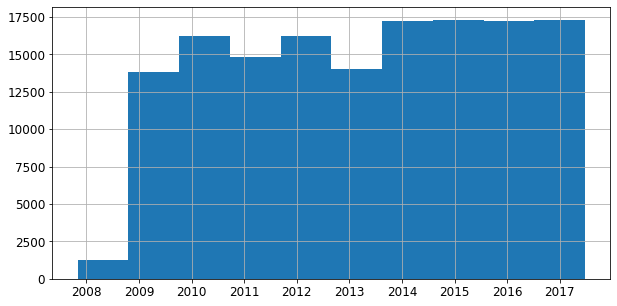

In [11]:
# Plot datetime
fig = pd.to_datetime(X_categorical["Date"]).hist(xlabelsize=12, ylabelsize=12,figsize=(10,5))

Para las variables de datetime puede tener valor extraer el mes.

In [12]:
transformer.extract_month_from_date(X_categorical, drop=False)
transformer.extract_month_from_date(X, drop=False)

#### Variables categóricas

In [13]:
pd.concat([X_categorical.nunique(), X_categorical.nunique(dropna=False)], axis=1).T

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,Month
0,3436,49,16,16,16,2,12
1,3436,49,17,17,17,3,12


*Date* y *Location* no tienen missing values. RainToday puede ser tratado como booleano siempre y cuando se eliminen o se inputen los valores faltantes.

/Users/ext_asalassa/Documents/CEIA/2doBim/ceia_add2021/clase8_tpintegrador/utils/plot_utils.py:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


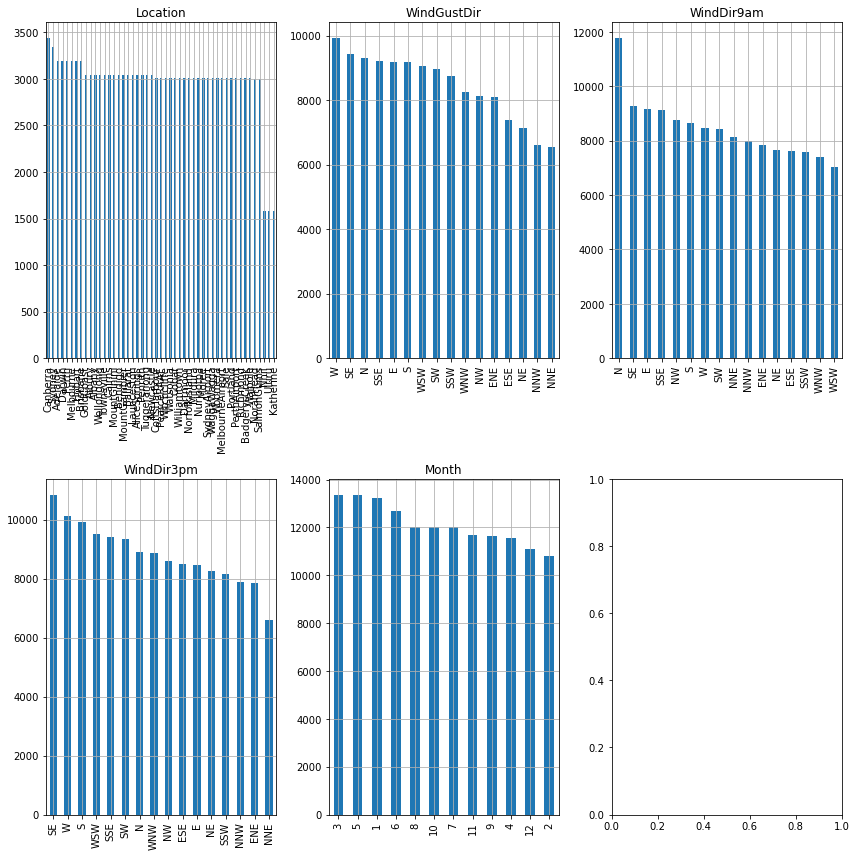

In [14]:
#cols = ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'Month']
plot_utils.display_dataset_bar_value_count(X_categorical[cols])

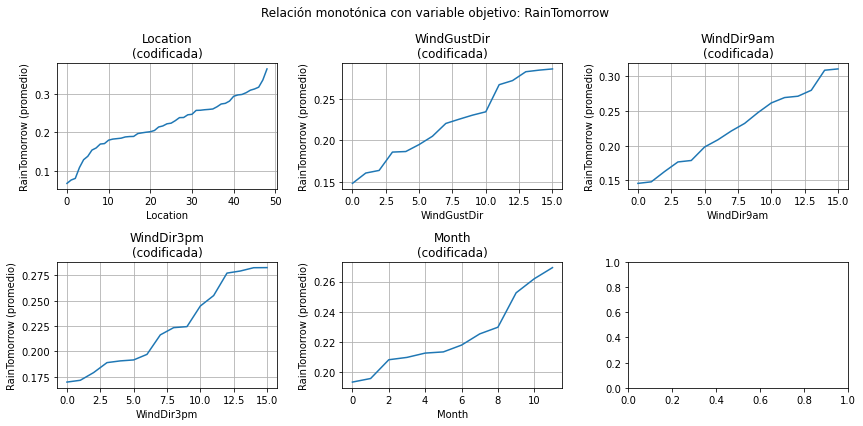

In [15]:
y_binenc = transformer.simple_class_encoding(Y.to_frame(), 'RainTomorrow', {'Yes': 1, 'No': 0} )

plot_utils.plot_cat_var_relations(X_categorical, y_binenc, column_names=['Location', 'WindGustDir','WindDir9am','WindDir3pm', 'Month'], label_name=label)

Se observa que todas las variables categóricas tienen una relación monotónica con la variable target, por lo que incluírlas en el modelo de clasificación aportaría valor.

#### Variables numéricas

In [16]:
pd.concat([X_numerical.nunique(), X_numerical.nunique(dropna=False)], axis=1).T

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,389,505,681,358,145,67,43,44,101,101,546,549,10,10,441,502
1,390,506,682,359,146,68,44,45,102,102,547,550,11,11,442,503


*Cloud3pm*, *Cloud3pm* son variables que podrían ser llegar a tomarse como categóricas. Podría intentarse una bucketización con el resto.
**Todas las columnas tienen missing values.**

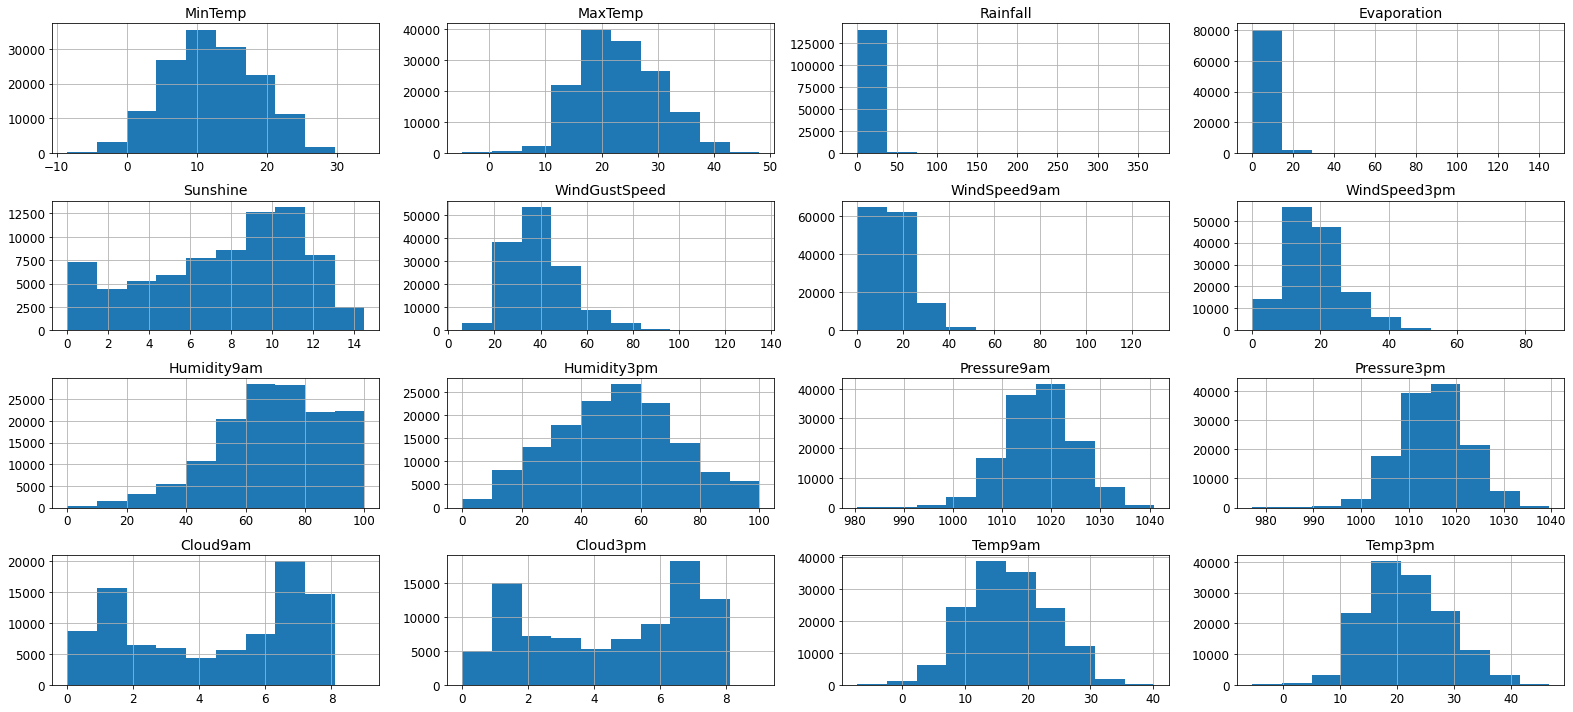

In [17]:
plot_utils.display_dataset_distributions(X_numerical)

<AxesSubplot:>

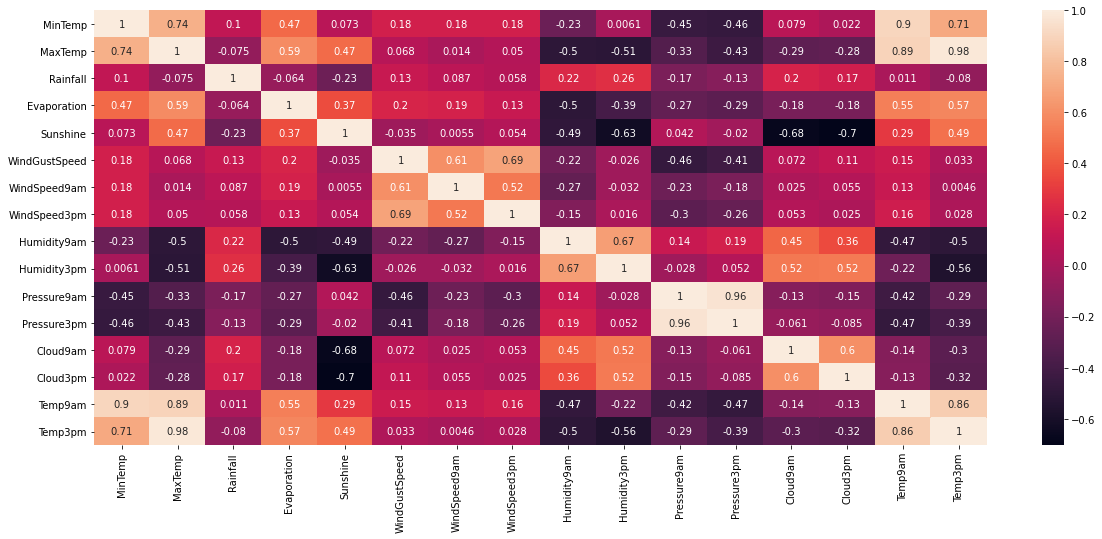

In [18]:
corrmat = X_numerical.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmat, annot=True, square=False)

A partir de la matriz de correlación anterior podemos graficar distintas gráficas de correlación.

Las variables de temperatura (MinTemp, MaxTemp, Temp9am, Temp3pm) presentan una correlación positiva entre ellas.

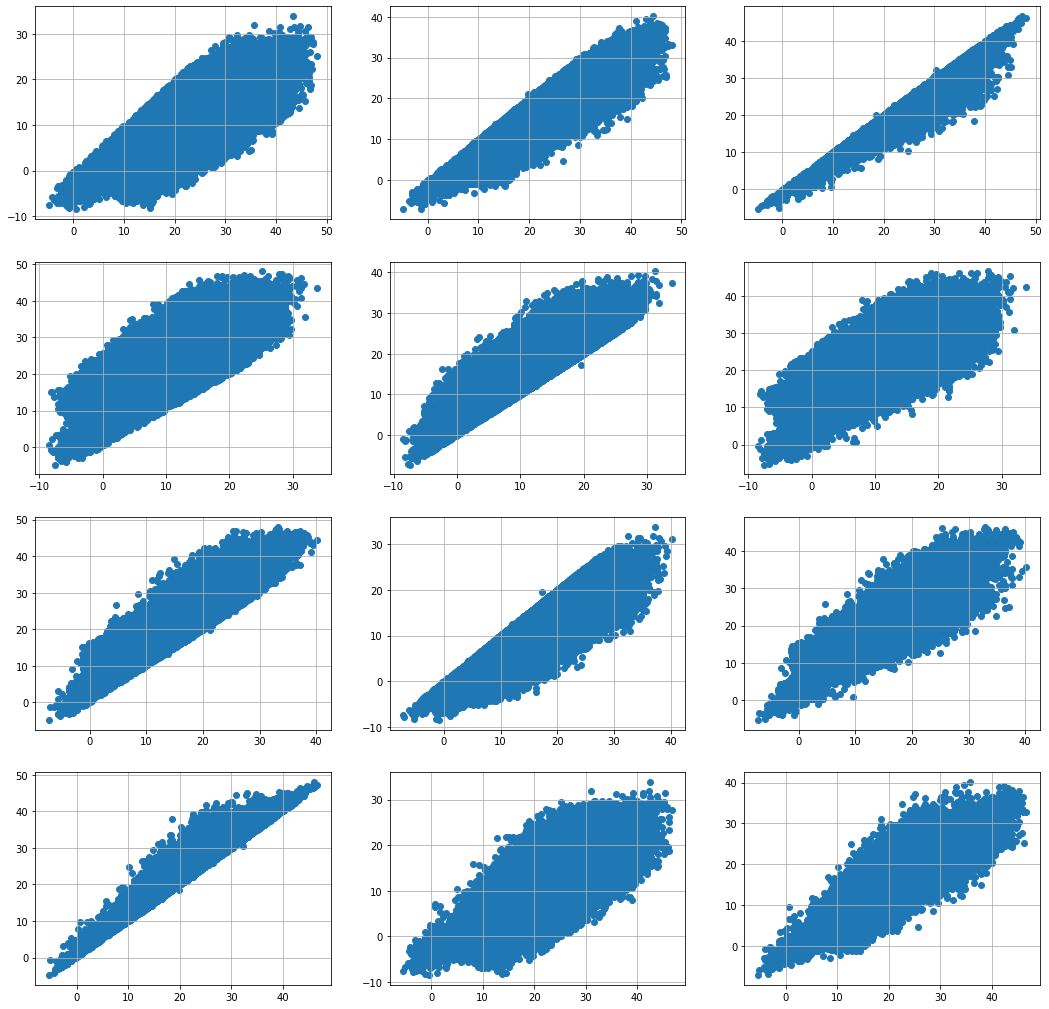

In [19]:
# Correlación entre las variables de temperatura (MaxTemp, MinTemp, Temp9am, Temp3pm)
fig, ax = plt.subplots(4, 3, figsize=(18,18))
ax[0,0].scatter(df['MaxTemp'], df['MinTemp'])
ax[0,0].grid()
ax[0,1].scatter(df['MaxTemp'], df['Temp9am'])
ax[0,1].grid()
ax[0,2].scatter(df['MaxTemp'], df['Temp3pm'])
ax[0,2].grid()
ax[1,0].scatter(df['MinTemp'], df['MaxTemp'])
ax[1,0].grid()
ax[1,1].scatter(df['MinTemp'], df['Temp9am'])
ax[1,1].grid()
ax[1,2].scatter(df['MinTemp'], df['Temp3pm'])
ax[1,2].grid()
ax[2,0].scatter(df['Temp9am'], df['MaxTemp'])
ax[2,0].grid()
ax[2,1].scatter(df['Temp9am'], df['MinTemp'])
ax[2,1].grid()
ax[2,2].scatter(df['Temp9am'], df['Temp3pm'])
ax[2,2].grid()
ax[3,0].scatter(df['Temp3pm'], df['MaxTemp'])
ax[3,0].grid()
ax[3,1].scatter(df['Temp3pm'], df['MinTemp'])
ax[3,1].grid()
ax[3,2].scatter(df['Temp3pm'], df['Temp9am'])
ax[3,2].grid()

Lo mismo ocurre con las variables relacionadas con la velocidad del viento

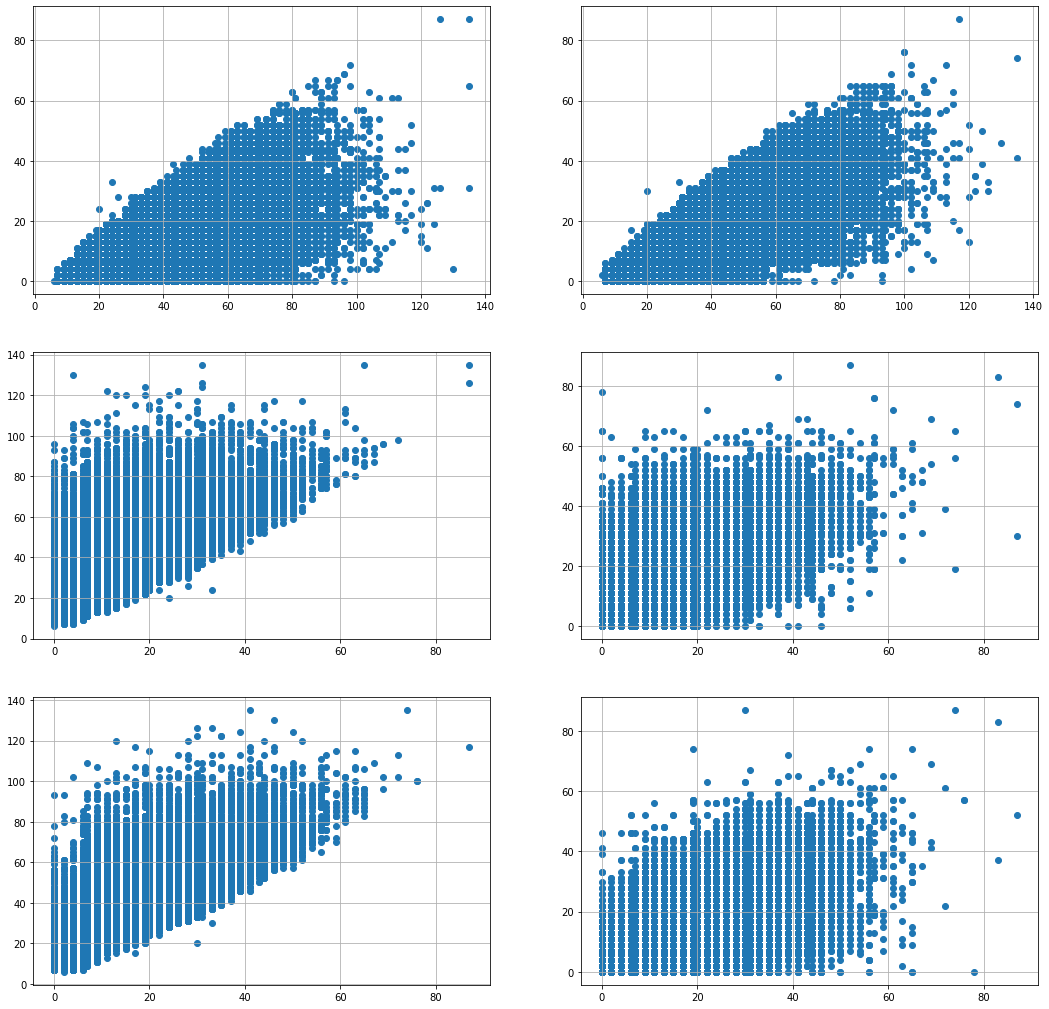

In [20]:
# Correlación entre las variables de velocidad del viento (WindGustSpeed, WindSpeed9am, WindSpeed3pm)
fig, ax = plt.subplots(3, 2, figsize=(18,18))
ax[0,0].scatter(df['WindGustSpeed'], df['WindSpeed9am'])
ax[0,0].grid()
ax[0,1].scatter(df['WindGustSpeed'], df['WindSpeed3pm'])
ax[0,1].grid()
ax[1,0].scatter(df['WindSpeed9am'], df['WindGustSpeed'])
ax[1,0].grid()
ax[1,1].scatter(df['WindSpeed9am'], df['WindSpeed3pm'])
ax[1,1].grid()
ax[2,0].scatter(df['WindSpeed3pm'], df['WindGustSpeed'])
ax[2,0].grid()
ax[2,1].scatter(df['WindSpeed3pm'], df['WindSpeed9am'])
ax[2,1].grid()

Se observa también una correlación negativa entre la variable relacionada con la luz solar y las variables de nubosidad.

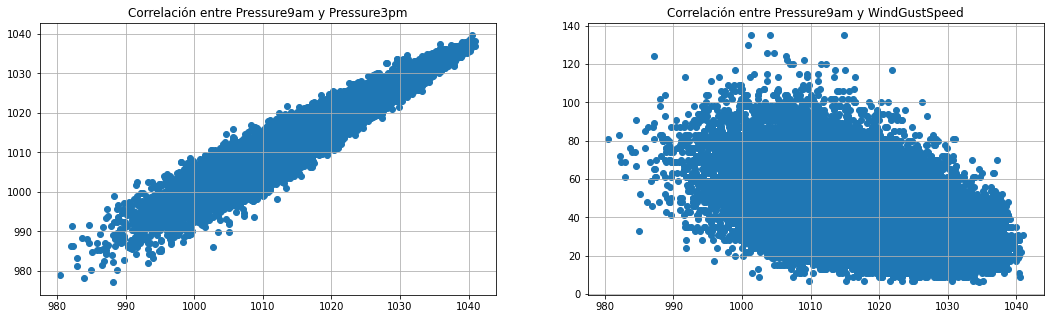

In [21]:
# Correlación entre las variables de presion y velocidad del viento (Pressure9am, Pressure3pm, WindGustSpeed)
fig, ax = plt.subplots(1, 2, figsize=(18,5))
ax[0].scatter(df['Pressure9am'], df['Pressure3pm'])
ax[0].set_title("Correlación entre Pressure9am y Pressure3pm")
ax[0].grid()
ax[1].scatter(df['Pressure9am'], df['WindGustSpeed'])
ax[1].set_title("Correlación entre Pressure9am y WindGustSpeed")
ax[1].grid()

#### Label

In [22]:
print("Cantidad de valores distintos del label:", Y.nunique())
print("Cantidad de valores distintos del label con missing_values:", Y.nunique(dropna=False))
print("Los posibles valores de Y son:", Y.unique())

Cantidad de valores distintos del label: 2
Cantidad de valores distintos del label con missing_values: 3
Los posibles valores de Y son: ['No' 'Yes' nan]


Las rows que no tienen label deberían desecharse

In [23]:
Y.value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

Los datos están desbalanceados. Se puede intentar usar class weigths para el entrenamiento. El label, al tener sólo dos clases, deberán trabajarse como una variable binaria 1/0.

___



## 2. Limpieza de datos
En esta sección se realizan las acciones de limpieza previas a cualquier partición de datos e ingeniería de features

### 2.1 Limpieza obligatoria inicial: registros que no tienen label

In [26]:
print(len(df))
df = df[df[label].isna() == False]
print(len(df))

142193
142193


In [32]:
X = df.drop(label, axis=1).copy()
X_numerical = X.select_dtypes(include='float64')
X_categorical = X.select_dtypes(include='object')

# Don't forget to add month
transformer.extract_month_from_date(X_categorical, drop=False)
transformer.extract_month_from_date(X, drop=False)

### 2.2 Limpieza inicial de datos

In [33]:
X.isna().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
Month                0
dtype: int64

#### 2.2.1 Approach 1: Mantener sólo columnas que tienen toda la información

In [34]:
#1/0
approach = 1
indices = X.isnull().sum(axis = 1) == 0
indices = indices[indices==True].index
X = X.loc[indices]
Y = Y.loc[indices]

In [35]:
print("Missing values: qty & percentaje")
pd.concat([X.isna().sum(), X.isna().sum()/len(X)], axis=1).T

Missing values: qty & percentaje


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Month
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 2.2.2 Approach 2: Eliminar columnas con gran cantidad de faltantes
Las columnas del dataset que tengan una gran cantidad de datos faltantes donde sea riesgoso implementar alguna técnica de imputación de datos serán eliminadas del dataset.

In [29]:
# Sólo variables numéricas
1/0
approach = 2
print("Missing values: qty & percentaje")
pd.concat([X_numerical.isna().sum(), X_numerical.isna().sum()/len(X_numerical)], axis=1).T

ZeroDivisionError: division by zero

Las columnas Evaporation, Sunshine, Cloud9am y Cloud3pm tienen una gran cantidad de datos faltantes y en principio serían excluídas del dataset final.

In [ ]:
X_numerical = dataset_handler.clean_colums(X_numerical, max_nans_percentage = 15.0)
X_numerical.columns

Dropped columns:                      0
Evaporation  42.789026
Sunshine     47.692924
Cloud9am     37.735332
Cloud3pm     40.152469


Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm'],
      dtype='object')

In [ ]:
# Sólo variables categóricas
print("Missing values: qty & percentaje")
pd.concat([X_categorical.isna().sum(), X_categorical.isna().sum()/len(X_categorical)], axis=1).T

Missing values: qty & percentaje


,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,Month
0,0.0,0.0,9330.000000,10013.000000,3778.00000,1406.000000,0.0
1,0.0,0.0,0.065615,0.070418,0.02657,0.009888,0.0


En principio no haría falta descartar ninguna columna categórica.

___
## 3. Esquema de validación de resultados

In [36]:
if approach != 1:
    Y = df[label]
    X = pd.concat([X_categorical[['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm','RainToday', 'Month']], X_numerical], axis=1)
print(len(Y))
print(len(X))
print(X.columns)

56420
56420
Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'Month'],
      dtype='object')


In [37]:
train_proportion = 0.9
#val_proportion = 0.1
test_propportion = 0.1

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=train_proportion, test_size=test_propportion)
#X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=train_proportion, test_size=val_proportion+test_propportion)
#X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, train_size=val_proportion/(val_proportion+test_propportion), test_size=test_propportion/(val_proportion+test_propportion))

In [38]:
# Reset index is needed to perform transformations
X_train = X_train.reset_index()
#X_val = X_val.reset_index()
X_test = X_test .reset_index()

In [39]:
print("Dataset length:", len(X))
print("Training set length:", len(X_train))
#print("Validation set length:", len(X_val))
print("Test set length:", len(X_test))

Dataset length: 56420
Training set length: 50778
Test set length: 5642


___
## 4. Preparación de datos e ingeniería de features

- ¿Qué supuestos puede realizar acerca de los datos faltantes? ¿Qué técnicas de imputación recomendaría?. Ensayar distintas técnicas y analizar los resultados. 
- En función del estudio inicial de las variables que se hizo en la sección anterior, elegir una técnica de codificación para cada variable. Cuando lo considere apropiado, ensayar distintas técnicas y comparar los resultados, teniendo en cuenta el tipo de clasificador a utilizar. Nota: para tipos de datos compuestos o estructurados, considerar la obtención de variables de tipo númerico/categórico.
- ¿Qué puede decir acerca de las relaciones entre las variables de entrada?

- Antes de entrenar un modelo de aprendizaje automático, ¿Podría identificar las variables de entrada de mayor importancia?. Considerar por lo menos dos técnicas para cada variable. Explique brevemente los métodos utilizados.

### 4.0 Conversión variables con dos clases.
Primeramente las variables binarias *RainToday* y *RainTomorrow* van a mapearse de *yes/no* a *1/0*. Como es simplemente un mapping, la transformación puede aplicarse a datos de test.

In [40]:
aux_dict = {'Yes': 1, 'No': 0}

print('before:', y_train.unique())
y_train = transformer.simple_class_encoding(y_train.to_frame(), label, aux_dict)[label]
print('after:', y_train.unique())

#y_val = transformer.simple_class_encoding(y_val.to_frame(), label, aux_dict)[label]
y_test = transformer.simple_class_encoding(y_test.to_frame(), label, aux_dict)[label]

before: ['No' 'Yes']
after: [0 1]


In [41]:
print('before:', X_train['RainToday'].unique())
X_train = transformer.simple_class_encoding(X_train, 'RainToday', aux_dict)
print('after:', X_train['RainToday'].unique())

#X_val = transformer.simple_class_encoding(X_val, 'RainToday', aux_dict)
X_test = transformer.simple_class_encoding(X_test, 'RainToday', aux_dict)

before: ['No' 'Yes']
after: [0 1]


### 4.1 Transformación inicial e Inputación de datos faltantes

#### 4.2 Variables categóricas

##### 4.2.1 Fecha
Sólo se tomará el mes y se le aplicará one hot encoding

In [42]:
df_ohe = transformer.one_hot_encoding(X_train['Month'].to_frame())
df_ohe.columns

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64')

In [43]:
#X_train = pd.concat((X_train, df_ohe), axis=1)
#X_train[['Month', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]].head()

pd.concat((X_train[['Month']], df_ohe), axis=1)

,Month,1,2,3,4,5,6,7,8,9,10,11,12
0,4,0,0,0,1,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,1,0,0,0,0
2,9,0,0,0,0,0,0,0,0,1,0,0,0
3,10,0,0,0,0,0,0,0,0,0,1,0,0
4,4,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50773,7,0,0,0,0,0,0,1,0,0,0,0,0
50774,1,1,0,0,0,0,0,0,0,0,0,0,0
50775,4,0,0,0,1,0,0,0,0,0,0,0,0
50776,1,1,0,0,0,0,0,0,0,0,0,0,0


In [37]:
#df_val = transformer.one_hot_encoding(X_val['Month'].to_frame())
#X_val = pd.concat((X_val, df_val), axis=1)

##### 4.2.2 Viento
Se tomarán las siglas de la dirección del viento y se transformará a un ángulo en radianes, correspondiéndose la dirección *E* con los $0 rad$. Las variables de viento consideradas como categóricas, luego de 

In [44]:
x_wind_cols = ['WindGustDir', 'WindDir9am', 'WindDir3pm']

In [45]:
dirs = ['E','ENE','NE','NNE','N','NNW','NW','WNW','W','WSW','SW','SSW','S','SSE','SE','ESE']
degs = np.deg2rad(np.arange(len(dirs))*360/16)

aux_dic = dict(zip(dirs, degs))
aux_dic

{'E': 0.0,
 'ENE': 0.39269908169872414,
 'NE': 0.7853981633974483,
 'NNE': 1.1780972450961724,
 'N': 1.5707963267948966,
 'NNW': 1.9634954084936207,
 'NW': 2.356194490192345,
 'WNW': 2.748893571891069,
 'W': 3.141592653589793,
 'WSW': 3.5342917352885173,
 'SW': 3.9269908169872414,
 'SSW': 4.319689898685966,
 'S': 4.71238898038469,
 'SSE': 5.105088062083414,
 'SE': 5.497787143782138,
 'ESE': 5.8904862254808625}

In [46]:
for col in x_wind_cols:
    X_train = transformer.simple_class_encoding(X_train, col, aux_dic)
    #X_val = transformer.simple_class_encoding(X_val, col, aux_dic)

In [47]:
for col in x_wind_cols:
    X_train[f'{col}_x'], X_train[f'{col}_y'] = transformer.decompose_angle_in_components(X_train, col)
    #X_val[f'{col}_x'], X_val[f'{col}_y'] = transformer.decompose_angle_in_components(X_val, col)

##### 4.2.3 Ubicación
Se utilizará el paquede de geopy para obetener la longitud y la latitud de cada una de las ubicaciones.

In [48]:
locations_dict, not_found = transformer.get_geolocations(X_train)
print(not_found)
locations_dict

[]


{'NorfolkIsland': (-29.0289575, 167.9587289126371),
 'Brisbane': (-27.4689682, 153.0234991),
 'SydneyAirport': (-33.9498935, 151.18196819346016),
 'MelbourneAirport': (-37.667111000000006, 144.83348076679553),
 'Mildura': (-34.1847265, 142.1624972),
 'Canberra': (-35.2975906, 149.1012676),
 'PerthAirport': (-31.9406095, 115.96760765137932),
 'Townsville': (-19.2569391, 146.8239537),
 'Perth': (-31.9527121, 115.8604796),
 'Watsonia': (-37.7110022, 145.083635),
 'Sale': (-38.1050358, 147.0647902),
 'Cairns': (-16.9206657, 145.7721854),
 'Sydney': (-33.8548157, 151.2164539),
 'Darwin': (-12.46044, 130.8410469),
 'Williamtown': (-32.815, 151.8427778),
 'Moree': (-29.4617202, 149.8407153),
 'WaggaWagga': (-35.115, 147.3677778),
 'Nuriootpa': (-34.4693354, 138.9939006),
 'Cobar': (-31.4983333, 145.8344444),
 'CoffsHarbour': (-30.2962407, 153.1135293),
 'Portland': (-38.3456231, 141.6042304),
 'Woomera': (-31.1999142, 136.8253532),
 'Melbourne': (-37.8142176, 144.9631608),
 'Hobart': (-42.882

In [49]:
X_train['Lat'], X_train['Lon'] = transformer.decompose_location_in_geolocations(X_train, dict_map = locations_dict, col_name = 'Location')
#X_val['Lat'], X_val['Lon'] = transformer.decompose_location_in_geolocations(X_val, dict_map = locations_dict, col_name = 'Location')

In [50]:
X_train[['Location', 'Lat', 'Lon']].head()

,Location,Lat,Lon
0,NorfolkIsland,-29.028958,167.958729
1,Brisbane,-27.468968,153.023499
2,SydneyAirport,-33.949894,151.181968
3,NorfolkIsland,-29.028958,167.958729
4,MelbourneAirport,-37.667111,144.833481


#### 4.1. Variables numéricas - Imputación de datos faltantes

In [51]:
x_cat_cols = list(X_train.select_dtypes(exclude=float).columns)
x_cat_cols

['index', 'Date', 'Location', 'RainToday', 'Month']

In [52]:
x_num_cols = list(X_train.select_dtypes(include=float).columns)
x_num_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'WindGustDir_x',
 'WindGustDir_y',
 'WindDir9am_x',
 'WindDir9am_y',
 'WindDir3pm_x',
 'WindDir3pm_y',
 'Lat',
 'Lon']

In [53]:
# Sólo variables numéricas
print("BEFORE - Missing values: qty & percentaje")
pd.concat([X_train[x_num_cols].isna().sum(), X_train[x_num_cols].isna().sum()/len(X_train[x_num_cols])], axis=1).T

BEFORE - Missing values: qty & percentaje


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Temp9am,Temp3pm,WindGustDir_x,WindGustDir_y,WindDir9am_x,WindDir9am_y,WindDir3pm_x,WindDir3pm_y,Lat,Lon
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
X_train[x_num_cols] = imputer.fill_missing_numerical_mice(X_train[x_num_cols], max_iter=50)

In [55]:
print("AFTER - Missing values: qty & percentaje")
pd.concat([X_train[x_num_cols].isna().sum(), X_train[x_num_cols].isna().sum()/len(X_train[x_num_cols])], axis=1).T

AFTER - Missing values: qty & percentaje


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Temp9am,Temp3pm,WindGustDir_x,WindGustDir_y,WindDir9am_x,WindDir9am_y,WindDir3pm_x,WindDir3pm_y,Lat,Lon
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
# Datos de validación
# X_val[x_num_cols] = imputer.fill_missing_numerical_mice(X_val[x_num_cols], max_iter=50)

In [57]:
# Transformar los valores de RainToday a 0/1
X_train['RainToday'] = X_train['RainToday'].round().astype(int)
X_train['RainToday'].unique()

array([0, 1])

In [58]:
#X_val['RainToday'] = X_val['RainToday'].round().astype(int)

___
## 5. Selección de features
- ¿Qué puede decir acerca de las relaciones entre las variables de entrada?
- Antes de entrenar un modelo de aprendizaje automático, ¿Podría identificar las variables de entrada de mayor importancia?. Considerar por lo menos dos técnicas para cada variable. Explique brevemente los métodos utilizados.

### 5.1 Correlación de las variables de entrada

In [60]:
# Columnas inicialmente numéricas, previo a transformar.
if approach != 1:
       columns_to_correlate = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
              'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
              'Pressure3pm', 'Temp9am', 'Temp3pm']
else:
       columns_to_correlate = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
              'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
              'Pressure3pm', 'Temp9am', 'Temp3pm', 'Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']

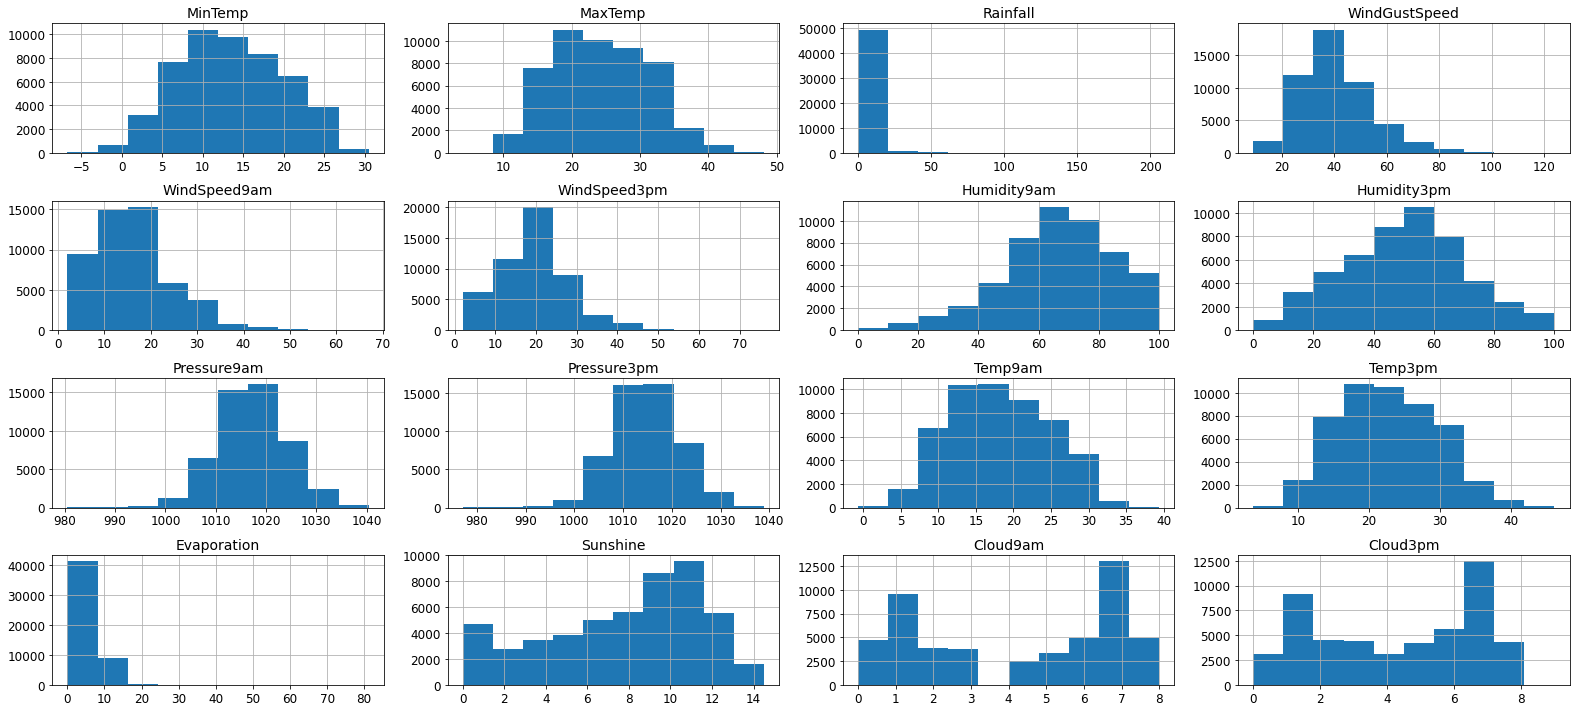

In [64]:
# Correlación sin normalizar
df_corr = X_train[columns_to_correlate].copy()
plot_utils.display_dataset_distributions(df_corr)

<AxesSubplot:>

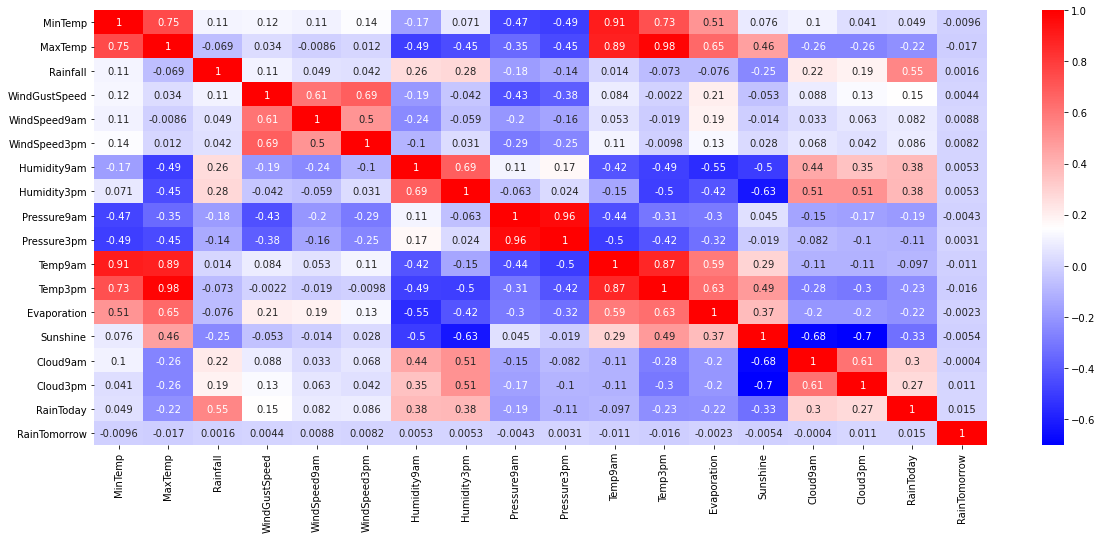

In [67]:
corr_mtx = pd.concat((df_corr, X_train['RainToday'], y_train), axis=1).corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corr_mtx, annot=True, square=False, cmap='bwr')

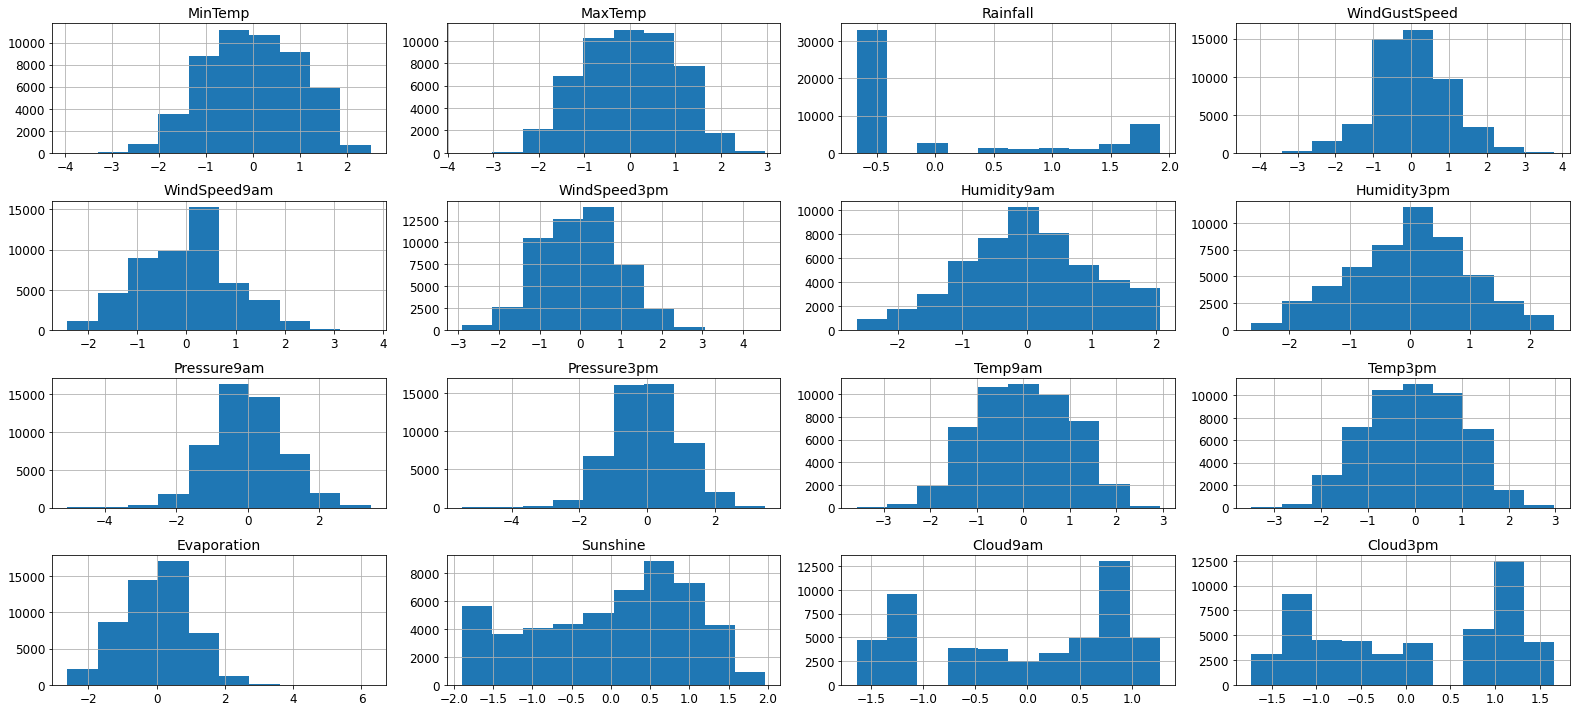

In [68]:
# Correlación normalizando normalizar
df_corr = transformer.power_transform(df_corr)
plot_utils.display_dataset_distributions(df_corr)

<AxesSubplot:>

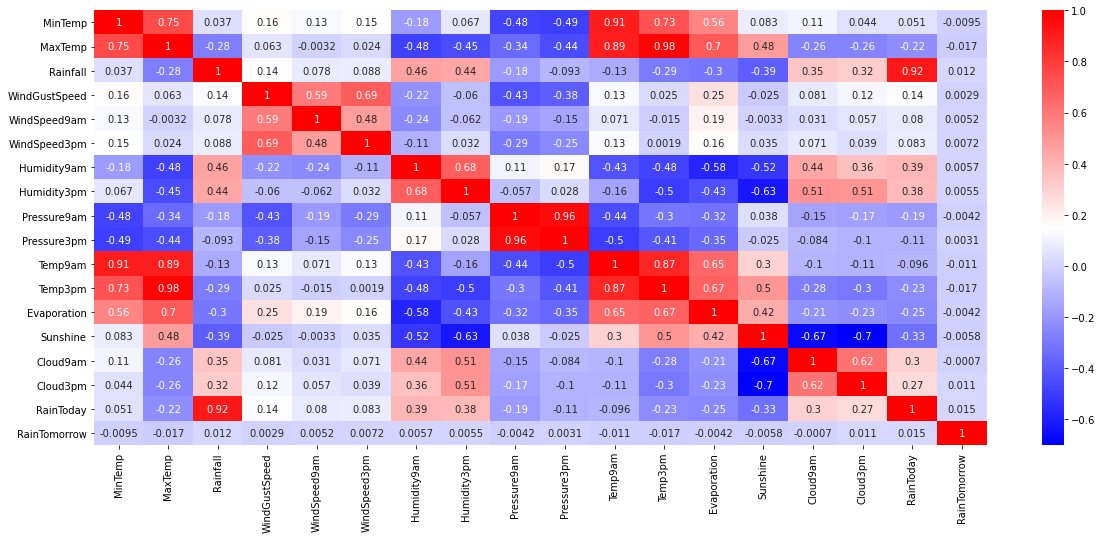

In [70]:
corr_mtx = pd.concat((df_corr, X_train['RainToday'], y_train), axis=1).corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corr_mtx, annot=True, square=False, cmap='bwr')

Variables con alta correlación:
1. MinTemp, MaxTem, Temp9am, Temp3pm. (Podría elegirse MinTemp y Temp3pm)
2. Rainfall está correlacionado con RainToday.

In [58]:
# De la matriz anterior, consideramos los que tienen correlación en v.a. mayor a 0.8
# Approach 2
corr_set_0 = set(['MaxTemp', 'Temp3pm'])
corr_set_1 = set(['MinTemp', 'Temp9am',])
corr_set_2 = set(['Pressure9am', 'Pressure3pm'])

### 5.2 Información mutua variables de salida

In [71]:
from sklearn.feature_selection import mutual_info_regression

MI = mutual_info_regression(X_train[columns_to_correlate], y_train)

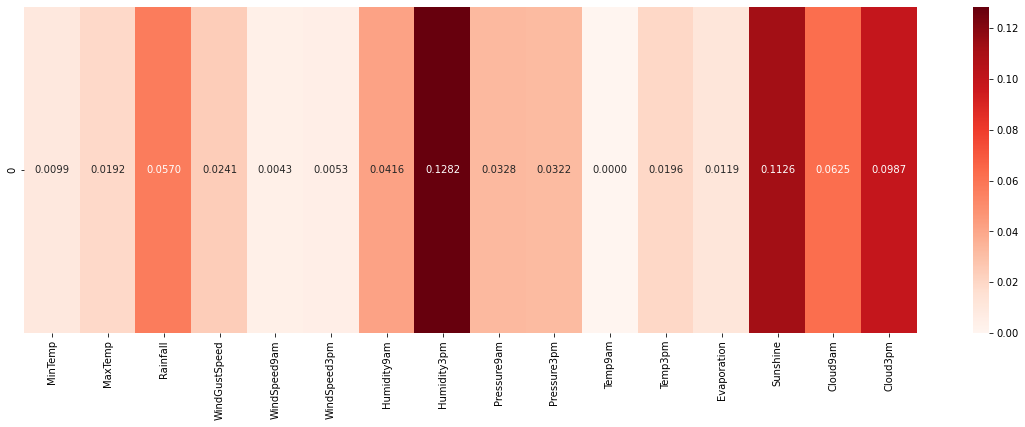

In [72]:
fig, ax = plt.subplots(1,1, figsize=(20,6))

sns.heatmap([MI], ax=ax, cmap='Reds', annot=True,fmt=".4f").set_xticklabels(columns_to_correlate)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

In [73]:
# Voy a fabricar un promedio entre las variablebles 9am y 3pm para ver si correlaciona mejor
ext_cols = []
if approach != 1:
    iter_cols = ['Temp', 'Pressure', 'Humidity', 'WindSpeed']
else:
    iter_cols = ['Temp', 'Pressure', 'Humidity', 'WindSpeed', 'Cloud']

for col in iter_cols:
    mean = (X_train[col+'9am'] + X_train[col+'3pm'])/2
    X_train[col+'Mean'] = mean
    ext_cols.append(col+'Mean')

MI_ext = mutual_info_regression(X_train[columns_to_correlate + ext_cols], y_train)

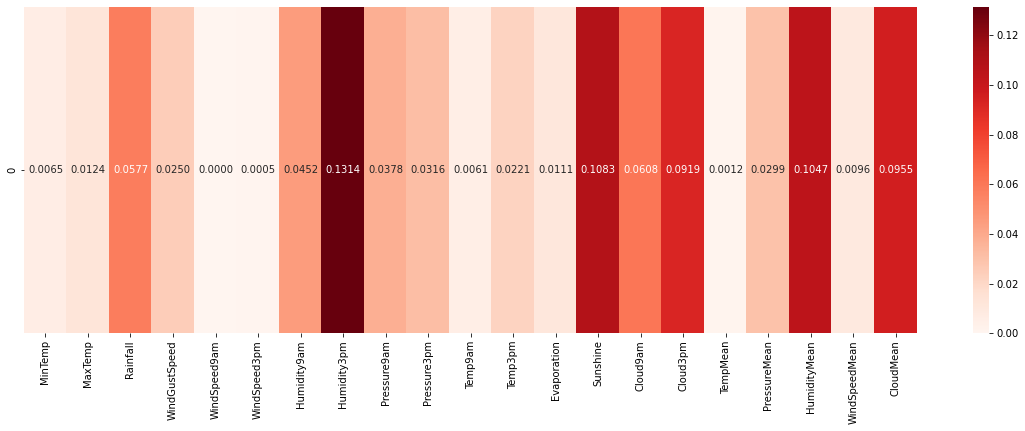

In [74]:
fig, ax = plt.subplots(1,1, figsize=(20,6))

sns.heatmap([MI_ext], ax=ax, cmap='Reds', annot=True,fmt=".4f").set_xticklabels(columns_to_correlate + ext_cols)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

In [215]:
reduced = 1
x_num_cols_reduced = ['Rainfall', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp3pm', 'Sunshine', 'CloudMean']

Usar el promedio de las velocidades del viento incrementa la información mutua. Para el resto de las variables no aporta mucho.

In [80]:
x_num_cols_full = columns_to_correlate + ext_cols
x_num_cols_full_withoutmean = columns_to_correlate
x_num_cols_full_withoutmean

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm',
 'Evaporation',
 'Sunshine',
 'Cloud9am',
 'Cloud3pm']

In [217]:
if approach == 1:
       x_num_cols_to_train_with = ['Rainfall', 'WindGustSpeed', 'WindSpeedMean', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
              'Pressure3pm', 'Temp3pm', 'Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']
else:
       x_num_cols_to_train_with = ['Rainfall', 'WindGustSpeed', 'WindSpeedMean', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
              'Pressure3pm', 'Temp3pm']

___
## 6. Entrenamiento de modelos

- Recurriendo a los modelos que conozca, defina una lista de modelos candidatos a entrenar (puede ser el mismo tipo de clasificador con distintos hiperparámetros). Nota: no se contemplará el desempeño del modelo elegido, sino las conclusiones que puedan establecerse a partir de la preparación previa de los datos.

- Ensaye distintas cadenas de procesamiento con las técnicas consideradas en la sección 3 (por ejemplo, distintas técnicas de imputación, selección de variables de entrada, codificación de variables categóricas, transformación, etc.).

### 6.0 Preparación de los datos

#### 6.0.1 Completamos datos de test

In [83]:
# Viento
for col in x_wind_cols:
    X_test = transformer.simple_class_encoding(X_test, col, aux_dic)

for col in x_wind_cols:
    X_test[f'{col}_x'], X_test[f'{col}_y'] = transformer.decompose_angle_in_components(X_test, col)

In [84]:
# Ubicación
X_test['Lat'], X_test['Lon'] = transformer.decompose_location_in_geolocations(X_train, dict_map = locations_dict, col_name = 'Location')

In [85]:
# Imputación
X_test[x_num_cols] = imputer.fill_missing_numerical_mice(X_train[x_num_cols], max_iter=50)

In [86]:
# Redondeo variable de dos clases
X_test['RainToday'] = X_test['RainToday'].round().astype(int)

In [225]:
# Medias sintéticas
for col in ['Temp', 'Pressure', 'Humidity', 'WindSpeed', 'Cloud']:
    mean = (X_test[col+'9am'] + X_test[col+'3pm'])/2
    X_test[col+'Mean'] = mean

#### 6.0.2 Seleccionamos las columnas del dataset con las que vamos a entrenar los modelos

In [88]:
columns_set = set(X_train.columns)
int_set = columns_set - set(columns_to_correlate + ext_cols)
aux_list = list(int_set) + x_num_cols_to_train_with
aux_list.sort()
aux_list

['Cloud3pm',
 'Cloud9am',
 'Date',
 'Evaporation',
 'Humidity3pm',
 'Humidity9am',
 'Lat',
 'Location',
 'Lon',
 'Month',
 'Pressure3pm',
 'Pressure9am',
 'RainToday',
 'Rainfall',
 'Sunshine',
 'Temp3pm',
 'WindDir3pm',
 'WindDir3pm_x',
 'WindDir3pm_y',
 'WindDir9am',
 'WindDir9am_x',
 'WindDir9am_y',
 'WindGustDir',
 'WindGustDir_x',
 'WindGustDir_y',
 'WindGustSpeed',
 'WindSpeedMean',
 'index']

In [97]:
undesired = ['index', 'WindGustDir', 'Location', 'WindDir3pm', 'WindDir9am', 'WindGustDir', 'Date']
categorical_1 = ['RainToday']
categorical_ohe = ['Month']

In [98]:
num_list = list(set(aux_list) - set(undesired) - set(categorical_1) - set(categorical_ohe))
num_list

['Rainfall',
 'WindGustDir_y',
 'WindDir3pm_y',
 'Humidity3pm',
 'Pressure3pm',
 'WindDir3pm_x',
 'Humidity9am',
 'WindGustSpeed',
 'Lon',
 'WindDir9am_y',
 'Lat',
 'Sunshine',
 'WindSpeedMean',
 'WindDir9am_x',
 'Cloud3pm',
 'WindGustDir_x',
 'Temp3pm',
 'Cloud9am',
 'Evaporation',
 'Pressure9am']

In [99]:
num_list_2 = list(set(x_num_cols_full_withoutmean) - set(undesired) - set(categorical_1) - set(categorical_ohe))
num_list_2

['Rainfall',
 'Humidity3pm',
 'Pressure3pm',
 'Cloud9am',
 'MinTemp',
 'Humidity9am',
 'WindSpeed3pm',
 'WindGustSpeed',
 'WindSpeed9am',
 'MaxTemp',
 'Sunshine',
 'Cloud3pm',
 'Temp3pm',
 'Temp9am',
 'Evaporation',
 'Pressure9am']

In [220]:
num_list_3 = list(set(x_num_cols_reduced) - set(undesired) - set(categorical_1) - set(categorical_ohe))
num_list_3.sort()
num_list_3

['CloudMean',
 'Humidity3pm',
 'Humidity9am',
 'Pressure3pm',
 'Pressure9am',
 'Rainfall',
 'Sunshine',
 'Temp3pm',
 'WindGustSpeed']

In [221]:
from sklearn.preprocessing import RobustScaler, StandardScaler, FunctionTransformer, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


numeric_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())])

categorical_transformer = OneHotEncoder(categories="auto", drop=None, sparse=False, handle_unknown="ignore")
binary_transformer = FunctionTransformer() # Función Identidad

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_list),
        ('cat', categorical_transformer, categorical_ohe),
        ('bin', binary_transformer, categorical_1),
    ]
)

preprocessor_2 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_list_2),
        ('cat', categorical_transformer, categorical_ohe),
        ('bin', binary_transformer, categorical_1),
    ]
)

preprocessor_3 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_list_3),
        ('cat', categorical_transformer, categorical_ohe),
        ('bin', binary_transformer, categorical_1),
    ]
)

### 6.1 Entrenamiento de modelos

In [170]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

#### 6.1.1 Regresión logística

In [297]:
modelLR = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classifier', LogisticRegression(verbose=True, max_iter=50, tol = 0.00001))])

In [298]:
modelLR.fit(X_train[num_list + categorical_ohe + categorical_1], y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/ext_asalassa/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['Rainfall', 'WindGustDir_y',
                                                   'WindDir3pm_y',
                                                   'Humidity3pm', 'Pressure3pm',
                                                   'WindDir3pm_x',
                                                   'Humidity9am',
                                                   'WindGustSpeed', 'Lon',
                                                   'WindDir9am_y', 'Lat',
                                                   'Sunshine', 'WindSpeedMean',
                                                   'WindDir9am_x', 'Cloud3pm',
                                                   'WindGustDir_x', 'Temp3pm',

In [299]:
sc = round(100*modelLR.score(X_test[num_list + categorical_ohe + categorical_1], y_test),2)
print("Mean accuracy:", sc)

Mean accuracy: 69.85


Text(0.5, 0, 'Falsos Positivos')

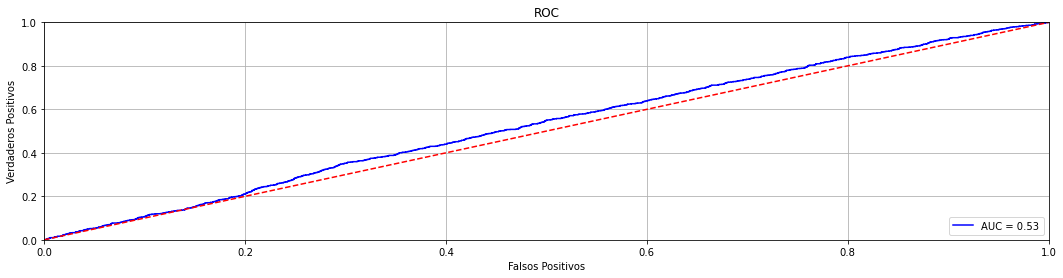

In [275]:
y_pred_LR = modelLR.predict_proba(X_test[num_list + categorical_ohe + categorical_1])

preds_LR = y_pred_LR[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds_LR)
roc_auc_LR = auc(fpr, tpr)

fig,axes = plt.subplots(1,1,figsize=(18,4))
axes.grid()
axes.set_title('ROC')
axes.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_LR)
axes.legend(loc = 'lower right')
axes.plot([0, 1], [0, 1],'r--')
axes.set_xlim([0, 1])
axes.set_ylim([0, 1])
axes.set_ylabel('Verdaderos Positivos')
axes.set_xlabel('Falsos Positivos')

___

In [276]:
modelLR2 = Pipeline(steps=[('preprocessor', preprocessor_2),
                       ('classifier', LogisticRegression(verbose=True, max_iter=50, tol = 0.00001))])

In [277]:
modelLR2.fit(X_train[num_list_2 + categorical_ohe + categorical_1], y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/ext_asalassa/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['Rainfall', 'Humidity3pm',
                                                   'Pressure3pm', 'Cloud9am',
                                                   'MinTemp', 'Humidity9am',
                                                   'WindSpeed3pm',
                                                   'WindGustSpeed',
                                                   'WindSpeed9am', 'MaxTemp',
                                                   'Sunshine', 'Cloud3pm',
                                                   'Temp3pm', 'Temp9am',
                                                   'Evaporation',
                                                   'Pressure9am']),
                   

In [278]:
sc = round(100*modelLR2.score(X_test[num_list_2 + categorical_ohe + categorical_1], y_test),2)
print("Mean accuracy:", sc)

Mean accuracy: 69.82


Text(0.5, 0, 'Falsos Positivos')

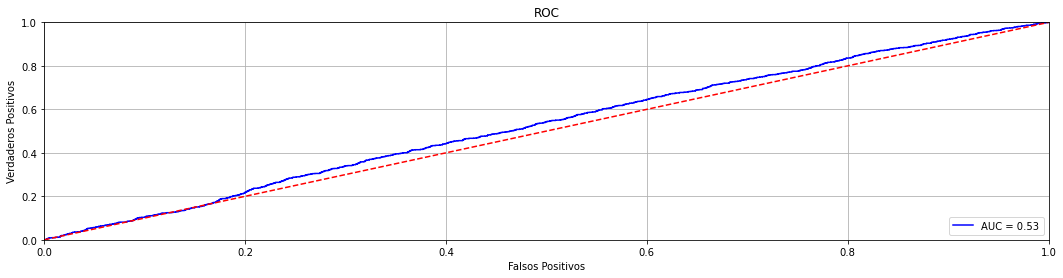

In [279]:
y_pred_LR2 = modelLR2.predict_proba(X_test[num_list_2 + categorical_ohe + categorical_1])

preds_LR2 = y_pred_LR2[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds_LR2)
roc_auc_LR2 = auc(fpr, tpr)

fig,axes = plt.subplots(1,1,figsize=(18,4))
axes.grid()
axes.set_title('ROC')
axes.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_LR2)
axes.legend(loc = 'lower right')
axes.plot([0, 1], [0, 1],'r--')
axes.set_xlim([0, 1])
axes.set_ylim([0, 1])
axes.set_ylabel('Verdaderos Positivos')
axes.set_xlabel('Falsos Positivos')

___

In [280]:
modelLR3 = Pipeline(steps=[('preprocessor', preprocessor_3),
                       ('classifier', LogisticRegression(verbose=True, max_iter=50, tol = 0.00001))])

In [281]:
modelLR3.fit(X_train[num_list_3 + categorical_ohe + categorical_1], y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['CloudMean', 'Humidity3pm',
                                                   'Humidity9am', 'Pressure3pm',
                                                   'Pressure9am', 'Rainfall',
                                                   'Sunshine', 'Temp3pm',
                                                   'WindGustSpeed']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Month']),
                                                 ('bin', FunctionTransformer()

In [282]:
sc = round(100*modelLR3.score(X_test[num_list_3 + categorical_ohe + categorical_1], y_test),2)
print("Mean accuracy:", sc)

Mean accuracy: 69.78


Text(0.5, 0, 'Falsos Positivos')

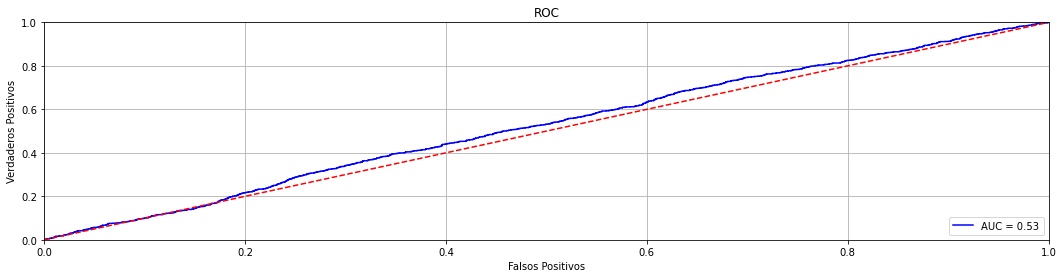

In [283]:
y_pred_LR3 = modelLR3.predict_proba(X_test[num_list_3 + categorical_ohe + categorical_1])

preds_LR3 = y_pred_LR3[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds_LR3)
roc_auc_LR3 = auc(fpr, tpr)

fig,axes = plt.subplots(1,1,figsize=(18,4))
axes.grid()
axes.set_title('ROC')
axes.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_LR3)
axes.legend(loc = 'lower right')
axes.plot([0, 1], [0, 1],'r--')
axes.set_xlim([0, 1])
axes.set_ylim([0, 1])
axes.set_ylabel('Verdaderos Positivos')
axes.set_xlabel('Falsos Positivos')

#### 6.1.2 Regresión logística cw

In [179]:
neg, pos = np.bincount(y_train)

In [180]:
weight_for_0 = (1 / neg) * ((neg+pos) / 2.0)
weight_for_1 = (1 / pos) * ((neg+pos) / 2.0)

In [181]:
modelLRcw = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classifier', LogisticRegression(class_weight={0: weight_for_0, 1: weight_for_1}, max_iter=500, tol = 0.00001))])

In [182]:
modelLRcw.fit(X_train[num_list + categorical_ohe + categorical_1], y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['Rainfall', 'WindGustDir_y',
                                                   'WindDir3pm_y',
                                                   'Humidity3pm', 'Pressure3pm',
                                                   'WindDir3pm_x',
                                                   'Humidity9am',
                                                   'WindGustSpeed', 'Lon',
                                                   'WindDir9am_y', 'Lat',
                                                   'Sunshine', 'WindSpeedMean',
                                                   'WindDir9am_x', 'Cloud3pm',
                                                   'WindGustDir_x', 'Temp3pm',

In [183]:
sc = round(100*modelLRcw.score(X_test[num_list + categorical_ohe + categorical_1], y_test),2)
print("Mean accuracy:", sc)

Mean accuracy: 62.11


Text(0.5, 0, 'Falsos Positivos')

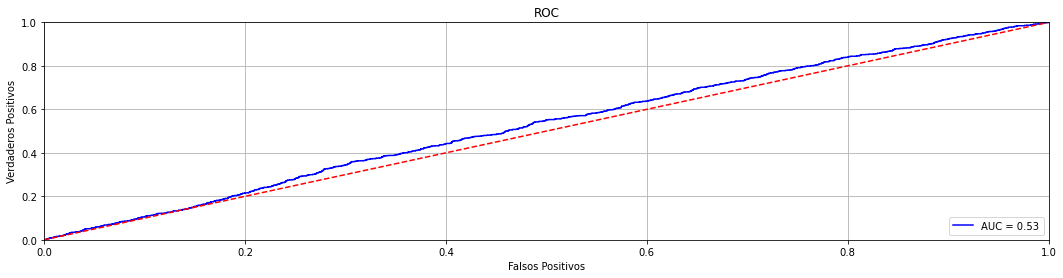

In [184]:
y_pred_LRcw = modelLRcw.predict_proba(X_test[num_list + categorical_ohe + categorical_1])

preds_LRcw = y_pred_LRcw[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds_LRcw)
roc_auc_LRcw = auc(fpr, tpr)

fig,axes = plt.subplots(1,1,figsize=(18,4))
axes.grid()
axes.set_title('ROC')
axes.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_LRcw)
axes.legend(loc = 'lower right')
axes.plot([0, 1], [0, 1],'r--')
axes.set_xlim([0, 1])
axes.set_ylim([0, 1])
axes.set_ylabel('Verdaderos Positivos')
axes.set_xlabel('Falsos Positivos')

#### 6.1.3 Red neuronal

In [341]:
modelNN = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MLPClassifier(verbose=True, batch_size=512, learning_rate_init=0.01, hidden_layer_sizes=(32,16,8,8,4,2), activation='relu', solver='adam', max_iter=50, alpha=0.001))
])

In [354]:
modelNN.fit(X_train[num_list + categorical_ohe + categorical_1], y_train)

Iteration 1, loss = 0.35862290
Iteration 2, loss = 0.32912336
Iteration 3, loss = 0.32045100
Iteration 4, loss = 0.31677943
Iteration 5, loss = 0.31283383
Iteration 6, loss = 0.31095022
Iteration 7, loss = 0.30931728
Iteration 8, loss = 0.30567184
Iteration 9, loss = 0.30330248
Iteration 10, loss = 0.30358446
Iteration 11, loss = 0.30137841
Iteration 12, loss = 0.29949712
Iteration 13, loss = 0.29941268
Iteration 14, loss = 0.29824708
Iteration 15, loss = 0.29743781
Iteration 16, loss = 0.29557394
Iteration 17, loss = 0.29448312
Iteration 18, loss = 0.29427901
Iteration 19, loss = 0.29493318
Iteration 20, loss = 0.29434233
Iteration 21, loss = 0.29186044
Iteration 22, loss = 0.29144591
Iteration 23, loss = 0.29174486
Iteration 24, loss = 0.28936042
Iteration 25, loss = 0.28945119
Iteration 26, loss = 0.28792280
Iteration 27, loss = 0.28768069
Iteration 28, loss = 0.29057409
Iteration 29, loss = 0.28746066
Iteration 30, loss = 0.28629271
Iteration 31, loss = 0.28715964
Iteration 32, los

/Users/ext_asalassa/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['Rainfall', 'WindGustDir_y',
                                                   'WindDir3pm_y',
                                                   'Humidity3pm', 'Pressure3pm',
                                                   'WindDir3pm_x',
                                                   'Humidity9am',
                                                   'WindGustSpeed', 'Lon',
                                                   'WindDir9am_y', 'Lat',
                                                   'Sunshine', 'WindSpeedMean',
                                                   'WindDir9am_x', 'Cloud3pm',
                                                   'WindGustDir_x', 'Temp3pm',

In [355]:
sc = round(100*modelNN.score(X_test[num_list + categorical_ohe + categorical_1], y_test),2)
print("Mean accuracy:", sc)

Mean accuracy: 68.59


Text(0.5, 0, 'Falsos Positivos')

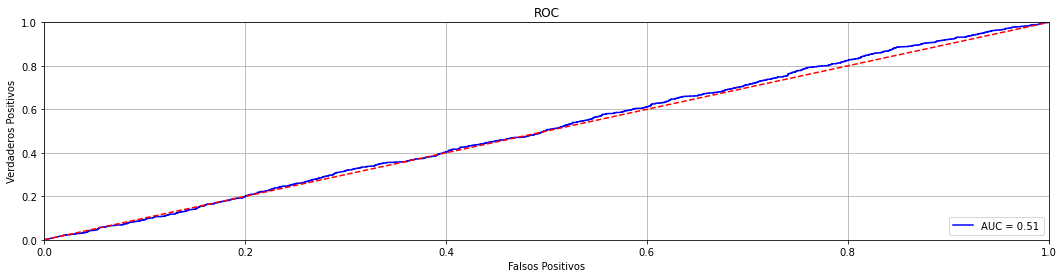

In [356]:
y_pred_NN = modelNN.predict_proba(X_test[num_list + categorical_ohe + categorical_1])


preds_NN = y_pred_NN[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds_NN)
roc_auc_NN = auc(fpr, tpr)

fig,axes = plt.subplots(1,1,figsize=(18,4))
axes.grid()
axes.set_title('ROC')
axes.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_NN)
axes.legend(loc = 'lower right')
axes.plot([0, 1], [0, 1],'r--')
axes.set_xlim([0, 1])
axes.set_ylim([0, 1])
axes.set_ylabel('Verdaderos Positivos')
axes.set_xlabel('Falsos Positivos')

___

In [357]:
modelNN2 = Pipeline(steps=[
    ('preprocessor', preprocessor_2),
    ('classifier', MLPClassifier(verbose=True, batch_size=512, learning_rate_init=0.01, hidden_layer_sizes=(32,16,8,8,4,2), activation='relu', solver='adam', max_iter=50, alpha=0.001))
])

In [358]:
modelNN2.fit(X_train[num_list_2 + categorical_ohe + categorical_1], y_train)

Iteration 1, loss = 0.57772152
Iteration 2, loss = 0.44213250
Iteration 3, loss = 0.37211633
Iteration 4, loss = 0.35375887
Iteration 5, loss = 0.34307683
Iteration 6, loss = 0.33824686
Iteration 7, loss = 0.33263894
Iteration 8, loss = 0.33077818
Iteration 9, loss = 0.32738051
Iteration 10, loss = 0.32553402
Iteration 11, loss = 0.32288166
Iteration 12, loss = 0.32375974
Iteration 13, loss = 0.32088848
Iteration 14, loss = 0.31929770
Iteration 15, loss = 0.31988246
Iteration 16, loss = 0.31775430
Iteration 17, loss = 0.31574668
Iteration 18, loss = 0.31586337
Iteration 19, loss = 0.31578926
Iteration 20, loss = 0.31504748
Iteration 21, loss = 0.31351628
Iteration 22, loss = 0.31359483
Iteration 23, loss = 0.31214104
Iteration 24, loss = 0.31206171
Iteration 25, loss = 0.30948119
Iteration 26, loss = 0.31015338
Iteration 27, loss = 0.31059361
Iteration 28, loss = 0.30986617
Iteration 29, loss = 0.30874861
Iteration 30, loss = 0.30936666
Iteration 31, loss = 0.30778234
Iteration 32, los

/Users/ext_asalassa/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['Rainfall', 'Humidity3pm',
                                                   'Pressure3pm', 'Cloud9am',
                                                   'MinTemp', 'Humidity9am',
                                                   'WindSpeed3pm',
                                                   'WindGustSpeed',
                                                   'WindSpeed9am', 'MaxTemp',
                                                   'Sunshine', 'Cloud3pm',
                                                   'Temp3pm', 'Temp9am',
                                                   'Evaporation',
                                                   'Pressure9am']),
                   

In [359]:
sc = round(100*modelNN2.score(X_test[num_list_2 + categorical_ohe + categorical_1], y_test),2)
print("Mean accuracy:", sc)

Mean accuracy: 69.07


Text(0.5, 0, 'Falsos Positivos')

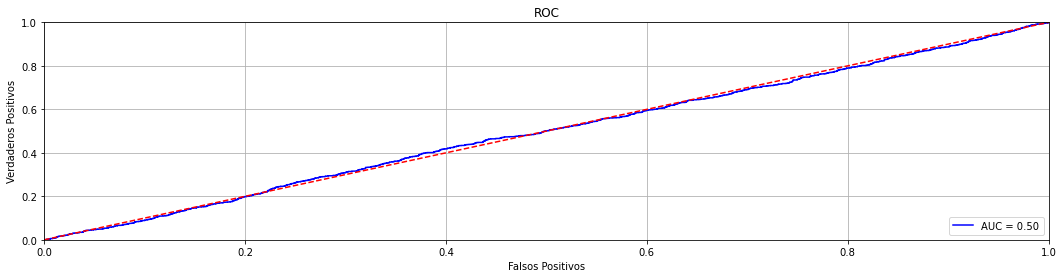

In [360]:
y_pred_NN2 = modelNN2.predict_proba(X_test[num_list_2 + categorical_ohe + categorical_1])

preds_NN2 = y_pred_NN2[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds_NN2)
roc_auc_NN2 = auc(fpr, tpr)

fig,axes = plt.subplots(1,1,figsize=(18,4))
axes.grid()
axes.set_title('ROC')
axes.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_NN2)
axes.legend(loc = 'lower right')
axes.plot([0, 1], [0, 1],'r--')
axes.set_xlim([0, 1])
axes.set_ylim([0, 1])
axes.set_ylabel('Verdaderos Positivos')
axes.set_xlabel('Falsos Positivos')

___

In [361]:
modelNN3 = Pipeline(steps=[
    ('preprocessor', preprocessor_3),
    ('classifier', MLPClassifier(verbose=True, batch_size=512, learning_rate_init=0.01, hidden_layer_sizes=(32,16,8,8,4), activation='relu', solver='adam', max_iter=50, alpha=0.001))
])

In [362]:
modelNN3.fit(X_train[num_list_3 + categorical_ohe + categorical_1], y_train)

Iteration 1, loss = 0.37837325
Iteration 2, loss = 0.33758752
Iteration 3, loss = 0.33293951
Iteration 4, loss = 0.33062877
Iteration 5, loss = 0.32783855
Iteration 6, loss = 0.32471420
Iteration 7, loss = 0.32552591
Iteration 8, loss = 0.32237556
Iteration 9, loss = 0.32501603
Iteration 10, loss = 0.32239866
Iteration 11, loss = 0.32144131
Iteration 12, loss = 0.32025409
Iteration 13, loss = 0.32004665
Iteration 14, loss = 0.31925671
Iteration 15, loss = 0.31836351
Iteration 16, loss = 0.31907006
Iteration 17, loss = 0.31819066
Iteration 18, loss = 0.31781623
Iteration 19, loss = 0.31685262
Iteration 20, loss = 0.31636753
Iteration 21, loss = 0.31641055
Iteration 22, loss = 0.31619195
Iteration 23, loss = 0.31552775
Iteration 24, loss = 0.31444054
Iteration 25, loss = 0.31445489
Iteration 26, loss = 0.31408594
Iteration 27, loss = 0.31312122
Iteration 28, loss = 0.31472836
Iteration 29, loss = 0.31341316
Iteration 30, loss = 0.31285132
Iteration 31, loss = 0.31327685
Iteration 32, los

/Users/ext_asalassa/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['CloudMean', 'Humidity3pm',
                                                   'Humidity9am', 'Pressure3pm',
                                                   'Pressure9am', 'Rainfall',
                                                   'Sunshine', 'Temp3pm',
                                                   'WindGustSpeed']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Month']),
                                                 ('bin', FunctionTransformer()

In [363]:
sc = round(100*modelNN3.score(X_test[num_list_3 + categorical_ohe + categorical_1], y_test),2)
print("Mean accuracy:", sc)

Mean accuracy: 69.28


Text(0.5, 0, 'Falsos Positivos')

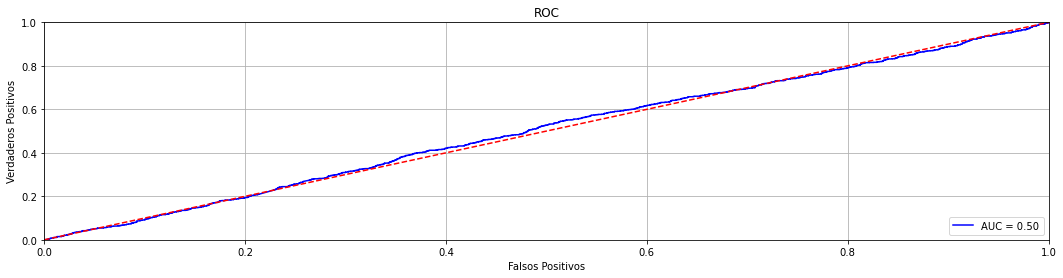

In [364]:
y_pred_NN3 = modelNN3.predict_proba(X_test[num_list_3 + categorical_ohe + categorical_1])

preds_NN3 = y_pred_NN3[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds_NN3)
roc_auc_NN3 = auc(fpr, tpr)

fig,axes = plt.subplots(1,1,figsize=(18,4))
axes.grid()
axes.set_title('ROC')
axes.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_NN3)
axes.legend(loc = 'lower right')
axes.plot([0, 1], [0, 1],'r--')
axes.set_xlim([0, 1])
axes.set_ylim([0, 1])
axes.set_ylabel('Verdaderos Positivos')
axes.set_xlabel('Falsos Positivos')

___
## 7. Evaluación de resultados y conclusiones

- ¿Qué puede concluir acerca de los modelos y preparaciones de datos ensayadas? Tener en cuenta como cada preparación afecta a los distintos modelos.

#### 7.1.1 Regresión logística

Accuracy: 85.53%


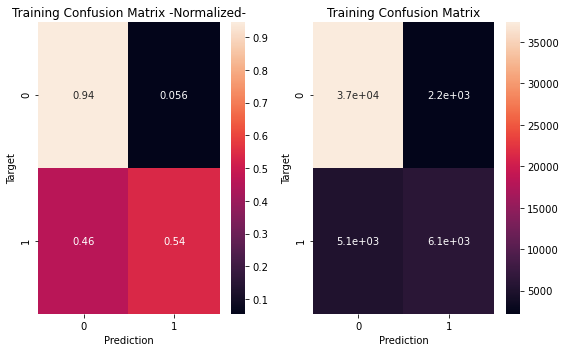

In [284]:
train_predsLR1 = modelLR.predict(X_train[num_list + categorical_ohe + categorical_1])
plot_utils.predict_and_plot(train_predsLR1, y_train, 'Training')

Accuracy: 69.85%


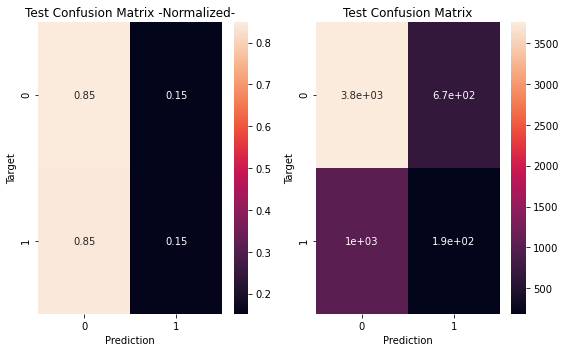

In [285]:
test_predsLR1 = modelLR.predict(X_test[num_list + categorical_ohe + categorical_1])
plot_utils.predict_and_plot(test_predsLR1, y_test, 'Test')

In [289]:
print('Training:')
print(classification_report(y_train, train_predsLR1))
print('Test:')
print(classification_report(y_test, test_predsLR1))

Training:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     39570
           1       0.73      0.54      0.62     11208

    accuracy                           0.86     50778
   macro avg       0.81      0.74      0.77     50778
weighted avg       0.85      0.86      0.85     50778

Test:
              precision    recall  f1-score   support

           0       0.78      0.85      0.82      4423
           1       0.22      0.15      0.18      1219

    accuracy                           0.70      5642
   macro avg       0.50      0.50      0.50      5642
weighted avg       0.66      0.70      0.68      5642



___

Accuracy: 85.43%


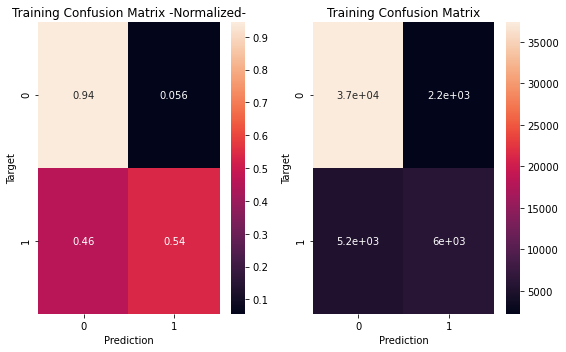

In [290]:
train_predsLR2 = modelLR2.predict(X_train[num_list_2 + categorical_ohe + categorical_1])
plot_utils.predict_and_plot(train_predsLR2, y_train, 'Training')

Accuracy: 69.82%


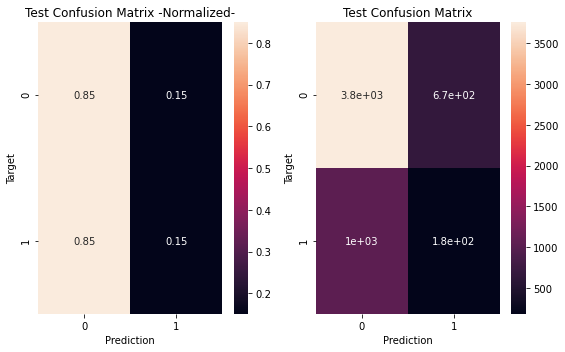

In [300]:
test_predsLR2 = modelLR2.predict(X_test[num_list_2 + categorical_ohe + categorical_1])
plot_utils.predict_and_plot(test_predsLR2, y_test, 'Test')

In [301]:
print('Training:')
print(classification_report(y_train, train_predsLR2))
print('Test:')
print(classification_report(y_test, test_predsLR2))

Training:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     39570
           1       0.73      0.54      0.62     11208

    accuracy                           0.85     50778
   macro avg       0.80      0.74      0.77     50778
weighted avg       0.85      0.85      0.85     50778

Test:
              precision    recall  f1-score   support

           0       0.78      0.85      0.82      4423
           1       0.22      0.15      0.18      1219

    accuracy                           0.70      5642
   macro avg       0.50      0.50      0.50      5642
weighted avg       0.66      0.70      0.68      5642



___

Accuracy: 85.15%


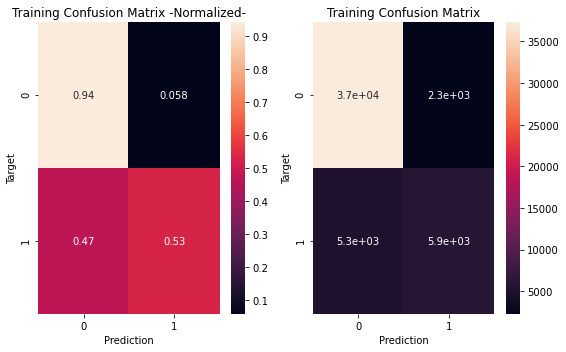

In [302]:
train_predsLR3 = modelLR3.predict(X_train[num_list_3 + categorical_ohe + categorical_1])
plot_utils.predict_and_plot(train_predsLR3, y_train, 'Training')

Accuracy: 69.78%


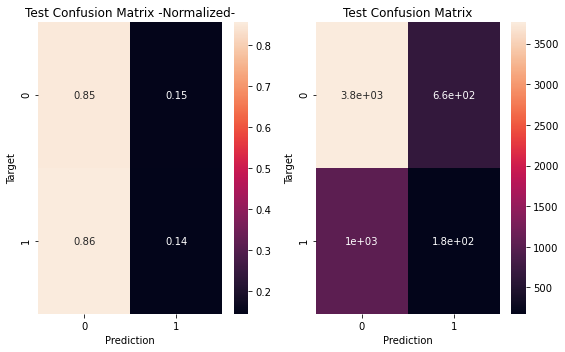

In [303]:
test_predsLR3 = modelLR3.predict(X_test[num_list_3 + categorical_ohe + categorical_1])
plot_utils.predict_and_plot(test_predsLR3, y_test, 'Test')

In [304]:
print('Training:')
print(classification_report(y_train, train_predsLR3))
print('Test:')
print(classification_report(y_test, test_predsLR3))

Training:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     39570
           1       0.72      0.53      0.61     11208

    accuracy                           0.85     50778
   macro avg       0.80      0.74      0.76     50778
weighted avg       0.84      0.85      0.84     50778

Test:
              precision    recall  f1-score   support

           0       0.78      0.85      0.82      4423
           1       0.21      0.14      0.17      1219

    accuracy                           0.70      5642
   macro avg       0.50      0.50      0.49      5642
weighted avg       0.66      0.70      0.68      5642



#### 7.1.2 Redes neuronales

Accuracy: 87.78%


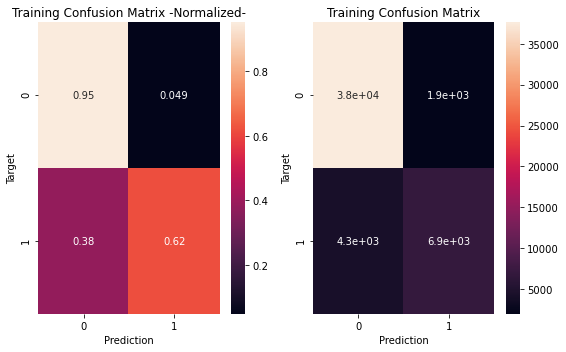

In [365]:
train_predsNN = modelNN.predict(X_train[num_list + categorical_ohe + categorical_1])
plot_utils.predict_and_plot(train_predsNN, y_train, 'Training')

Accuracy: 68.59%


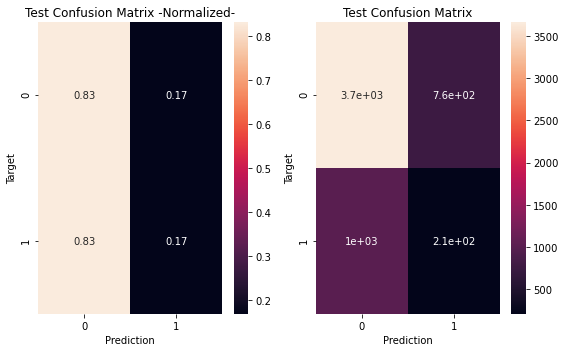

In [366]:
test_predsNN1 = modelNN.predict(X_test[num_list + categorical_ohe + categorical_1])
plot_utils.predict_and_plot(test_predsNN1, y_test, 'Test')

In [368]:
print('Training:')
print(classification_report(y_train, train_predsNN))
print('Test:')
print(classification_report(y_test, test_predsNN1))

Training:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92     39570
           1       0.78      0.62      0.69     11208

    accuracy                           0.88     50778
   macro avg       0.84      0.79      0.81     50778
weighted avg       0.87      0.88      0.87     50778

Test:
              precision    recall  f1-score   support

           0       0.78      0.83      0.81      4423
           1       0.21      0.17      0.19      1219

    accuracy                           0.69      5642
   macro avg       0.50      0.50      0.50      5642
weighted avg       0.66      0.69      0.67      5642



___

Accuracy: 86.97%


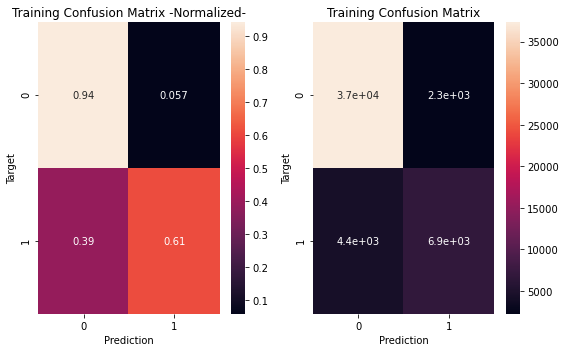

In [369]:
train_predsNN2 = modelNN2.predict(X_train[num_list_2 + categorical_ohe + categorical_1])
plot_utils.predict_and_plot(train_predsNN2, y_train, 'Training')

Accuracy: 69.07%


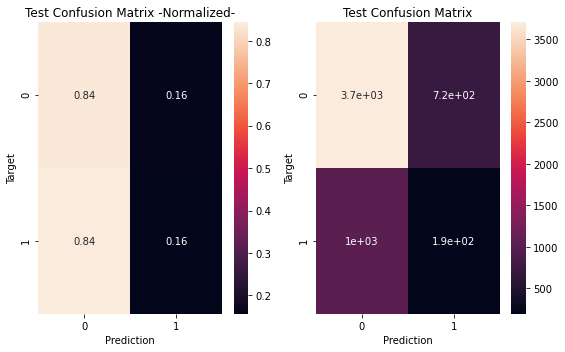

In [371]:
test_predsNN2 = modelNN2.predict(X_test[num_list_2 + categorical_ohe + categorical_1])
plot_utils.predict_and_plot(test_predsNN2, y_test, 'Test')

In [372]:
print('Training:')
print(classification_report(y_train, train_predsNN2))
print('Test:')
print(classification_report(y_test, test_predsNN2))

Training:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     39570
           1       0.75      0.61      0.67     11208

    accuracy                           0.87     50778
   macro avg       0.82      0.78      0.80     50778
weighted avg       0.86      0.87      0.86     50778

Test:
              precision    recall  f1-score   support

           0       0.78      0.84      0.81      4423
           1       0.21      0.16      0.18      1219

    accuracy                           0.69      5642
   macro avg       0.50      0.50      0.49      5642
weighted avg       0.66      0.69      0.67      5642



___

Accuracy: 86.48%


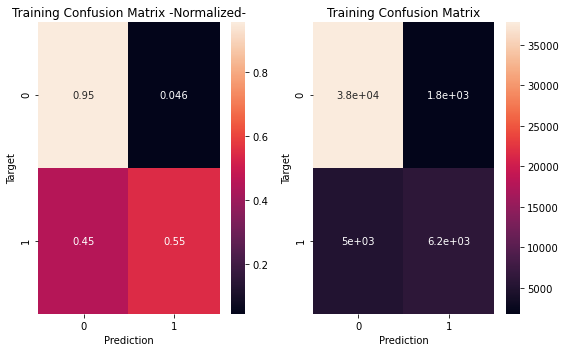

In [373]:
train_predsNN3 = modelNN3.predict(X_train[num_list_3 + categorical_ohe + categorical_1])
plot_utils.predict_and_plot(train_predsNN3, y_train, 'Training')

Accuracy: 69.28%


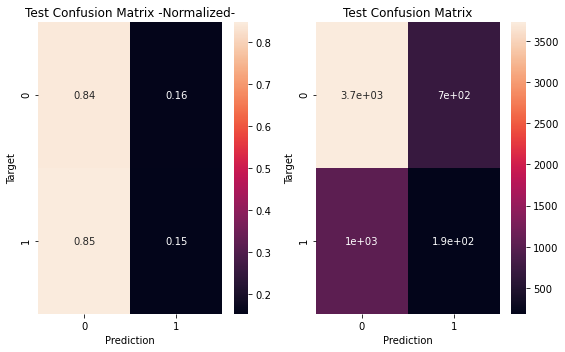

In [374]:
test_predsNN3 = modelNN3.predict(X_test[num_list_3 + categorical_ohe + categorical_1])
plot_utils.predict_and_plot(test_predsNN3, y_test, 'Test')

In [375]:
print('Training:')
print(classification_report(y_train, train_predsLR3))
print('Test:')
print(classification_report(y_test, test_predsLR3))

Training:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     39570
           1       0.72      0.53      0.61     11208

    accuracy                           0.85     50778
   macro avg       0.80      0.74      0.76     50778
weighted avg       0.84      0.85      0.84     50778

Test:
              precision    recall  f1-score   support

           0       0.78      0.85      0.82      4423
           1       0.21      0.14      0.17      1219

    accuracy                           0.70      5642
   macro avg       0.50      0.50      0.49      5642
weighted avg       0.66      0.70      0.68      5642



Conlusión: La red neuronal es el modelo que mejor aprende los datos de training. A la hora de hacer predicciones sobre los datos de test, la perfomance se degrada. Teniendo en cuenta que los ensayos realizados, el error se puede haber introducido al hacer la imputación sobre los datos de test.